### 1. mean and variance, which are kind of point estimation. 

### 2. Point estimation means using sample data to calculate a single value which is to serve as a 'best estimation' of an unknown population. 

### 3. However, this it not enough because point estimations can be deceiving. 
#### 4. For each probability distribution function, we have a cumulative distribution function(CDF)

# Uniform Distribution

[2 4 5 ... 2 2 6]


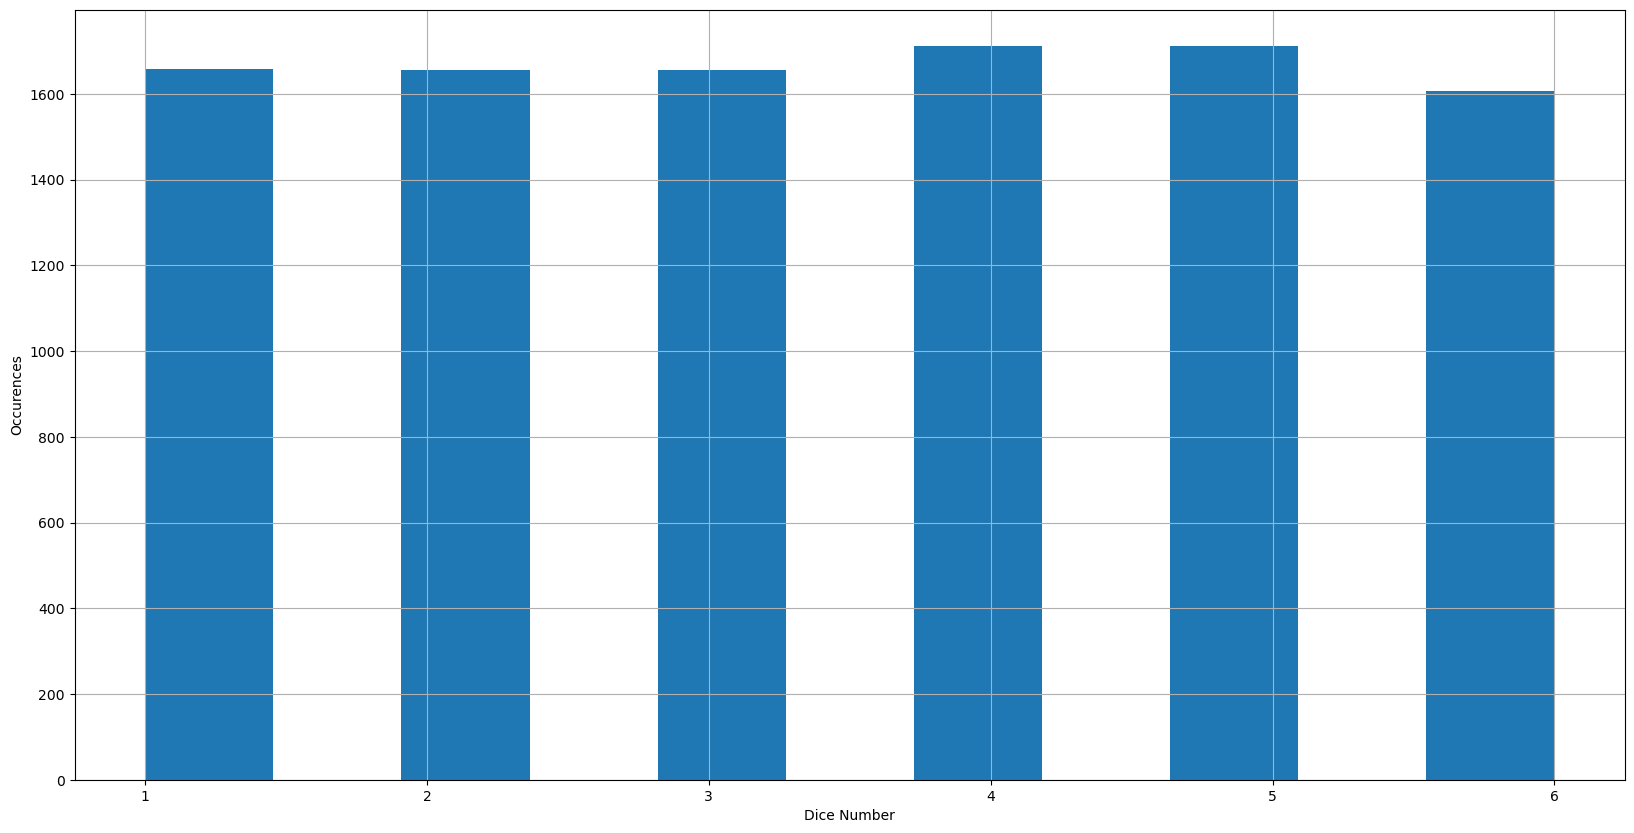

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#define a function to simulate rolling a dice
def dice():
    number=  [1,2,3,4,5,6]
    return random.choice(number)

series = np.array([dice() for x in range(10000)])
print(series)

plt.figure(figsize = (20,10))
plt.hist(series,bins = 11,align = 'mid')
plt.xlabel('Dice Number')
plt.ylabel('Occurences')
plt.grid()
plt.show()

In [2]:
print(len([x for x in series if x <= 3])/float(len(series)))
print(np.mean(series))

0.497
3.4985


# Binomial Distribution

In [6]:
def trial():
    number = [1,2,3,4,5,6,7,8,9,10]
    a = random.choice(number)
    return 1 if a <= 7 else 0

res = [trial() for x in range(10)]
print(sum(res))

def binomial(number):
    l = []
    for i in range(10000):
        res = [trial() for x in range(10)]
        l.append(sum(res))
    return len([x for x in l if x == number])/float(len(l))
print(binomial(8))

print('\n')

prob = []
for i in range(1,11):
    prob.append(binomial(i))
prob_s = pd.Series(prob,index = range(1,11))
print(prob_s)


8
0.2376


1     0.0000
2     0.0016
3     0.0117
4     0.0332
5     0.1058
6     0.2073
7     0.2652
8     0.2393
9     0.1226
10    0.0321
dtype: float64


In [9]:
from math import factorial
print((float(factorial(10))/(factorial(7)*factorial(10-7)))*(0.7**7)*(0.3**3))

print((float(factorial(10))/(factorial(8)*factorial(10-8)))*(0.7**8)*(0.3**2))


0.2668279319999998
0.23347444049999988


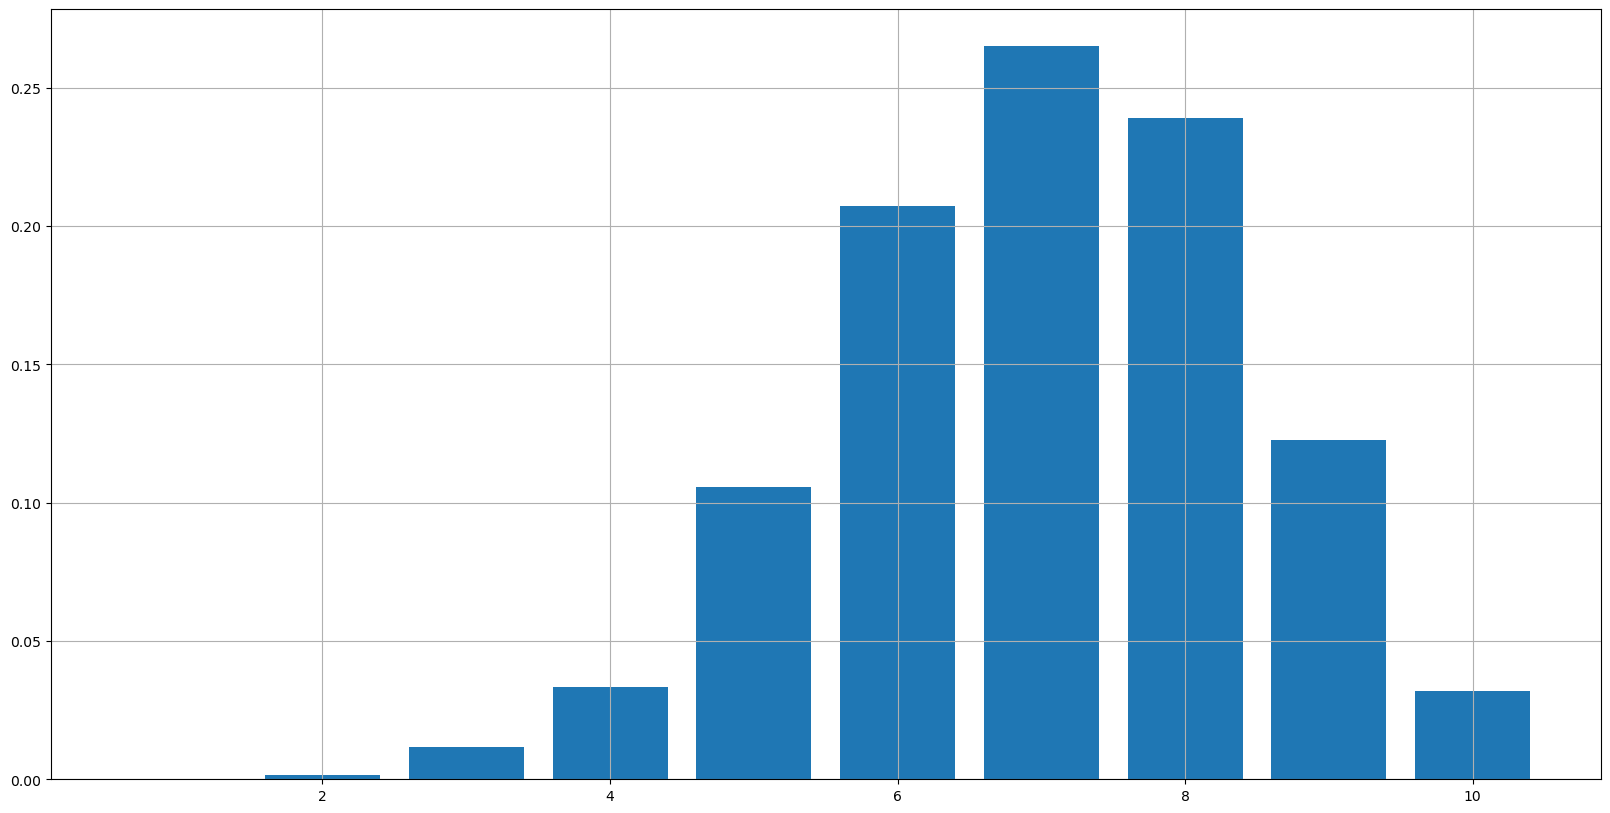

In [8]:
plt.figure(figsize = (20,10))
plt.bar(range(1,11),prob)
plt.grid()
plt.show()

### Normal Distribution

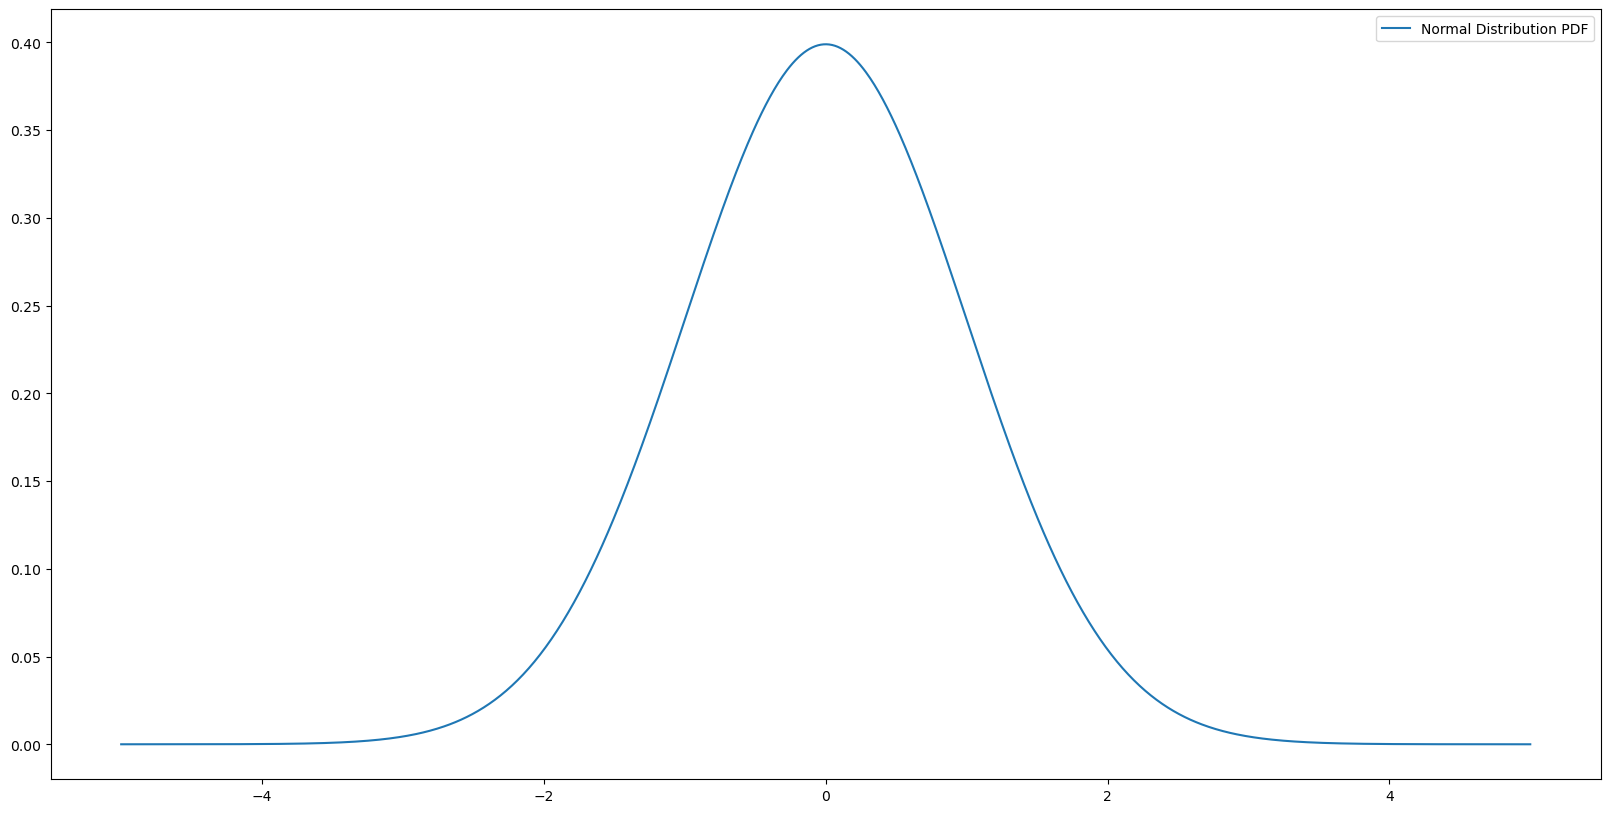

In [14]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 10))

# Create a normal distribution object with mean=0 and standard deviation=1
distribution = norm()

# Generate data points for the x-axis
x_values = np.linspace(-5, 5, 1000)

# Plot the density using the PDF (probability density function)
plt.plot(x_values, distribution.pdf(x_values), label='Normal Distribution PDF')
plt.legend()
plt.show()


In [20]:
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 30 19:41:59 2023

@author: jrjol
"""
from polygon import RESTClient

client = RESTClient(api_key="ocunxnOqC0pnltRqT3VkOiKeCmPE49L7")

import requests

url = "https://api.polygon.io/v2/aggs/ticker/SPY/range/1/day/2015-10-22/2024-01-07?adjusted=true&sort=asc&limit=5000&apiKey=ocunxnOqC0pnltRqT3VkOiKeCmPE49L7"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print("Failed to retrieve data. Status code:", response.status_code)
    
import pandas as pd

results = data["results"]
df = pd.DataFrame(results)

# convert the time from mili-second to datetime 
df['t'] = pd.to_datetime(df['t'], unit='ms')

df.index = df['t']
spy_table = df

spy = spy_table.loc['2009':'2024',['o','c']]
spy['log_return'] = np.log(spy.c).diff()
spy = spy.dropna()
spy


{'ticker': 'SPY', 'queryCount': 2065, 'resultsCount': 2065, 'adjusted': True, 'results': [{'v': 175150531.0, 'vw': 204.1272, 'o': 202.98, 'c': 205.26, 'h': 205.51, 'l': 202.81, 't': 1445486400000, 'n': 472770}, {'v': 144798285.0, 'vw': 206.9993, 'o': 207.25, 'c': 207.51, 'h': 207.95, 'l': 206.3, 't': 1445572800000, 'n': 415961}, {'v': 69222240.0, 'vw': 207.0612, 'o': 207.3, 'c': 207, 'h': 207.37, 'l': 206.56, 't': 1445832000000, 'n': 228237}, {'v': 78111647.0, 'vw': 206.3805, 'o': 206.2, 'c': 206.6, 'h': 207, 'l': 205.79, 't': 1445918400000, 'n': 273129}, {'v': 136067349.0, 'vw': 207.6229, 'o': 207, 'c': 208.95, 'h': 208.98, 'l': 206.21, 't': 1446004800000, 'n': 433475}, {'v': 90726308.0, 'vw': 208.7627, 'o': 208.35, 'c': 208.83, 'h': 209.27, 'l': 208.21, 't': 1446091200000, 'n': 276181}, {'v': 131298016.0, 'vw': 208.6129, 'o': 209.06, 'c': 207.93, 'h': 209.44, 'l': 207.74, 't': 1446177600000, 'n': 353836}, {'v': 86644803.0, 'vw': 209.6025, 'o': 208.32, 'c': 210.39, 'h': 210.62, 'l': 2

,o,c,log_return
t,,,
2015-10-23 04:00:00,207.25,207.51,0.010902
2015-10-26 04:00:00,207.30,207.00,-0.002461
2015-10-27 04:00:00,206.20,206.60,-0.001934
2015-10-28 04:00:00,207.00,208.95,0.011310
2015-10-29 04:00:00,208.35,208.83,-0.000574
...,...,...,...
2023-12-29 05:00:00,476.49,475.31,-0.002899
2024-01-02 05:00:00,472.16,472.65,-0.005612
2024-01-03 05:00:00,470.43,468.79,-0.008200


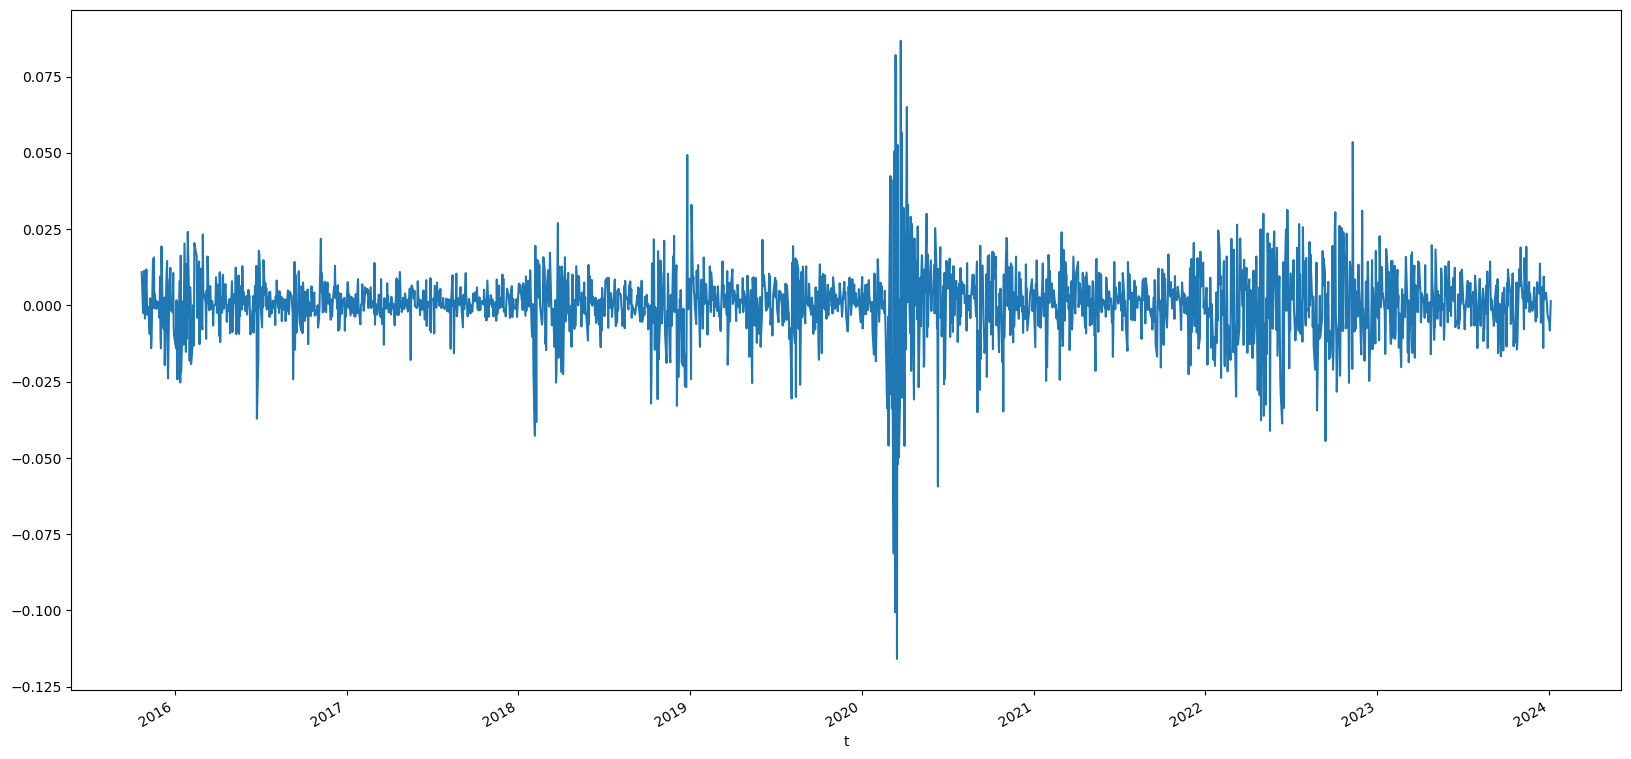

In [21]:
plt.figure(figsize = (20,10))
spy.log_return.plot()
plt.show()

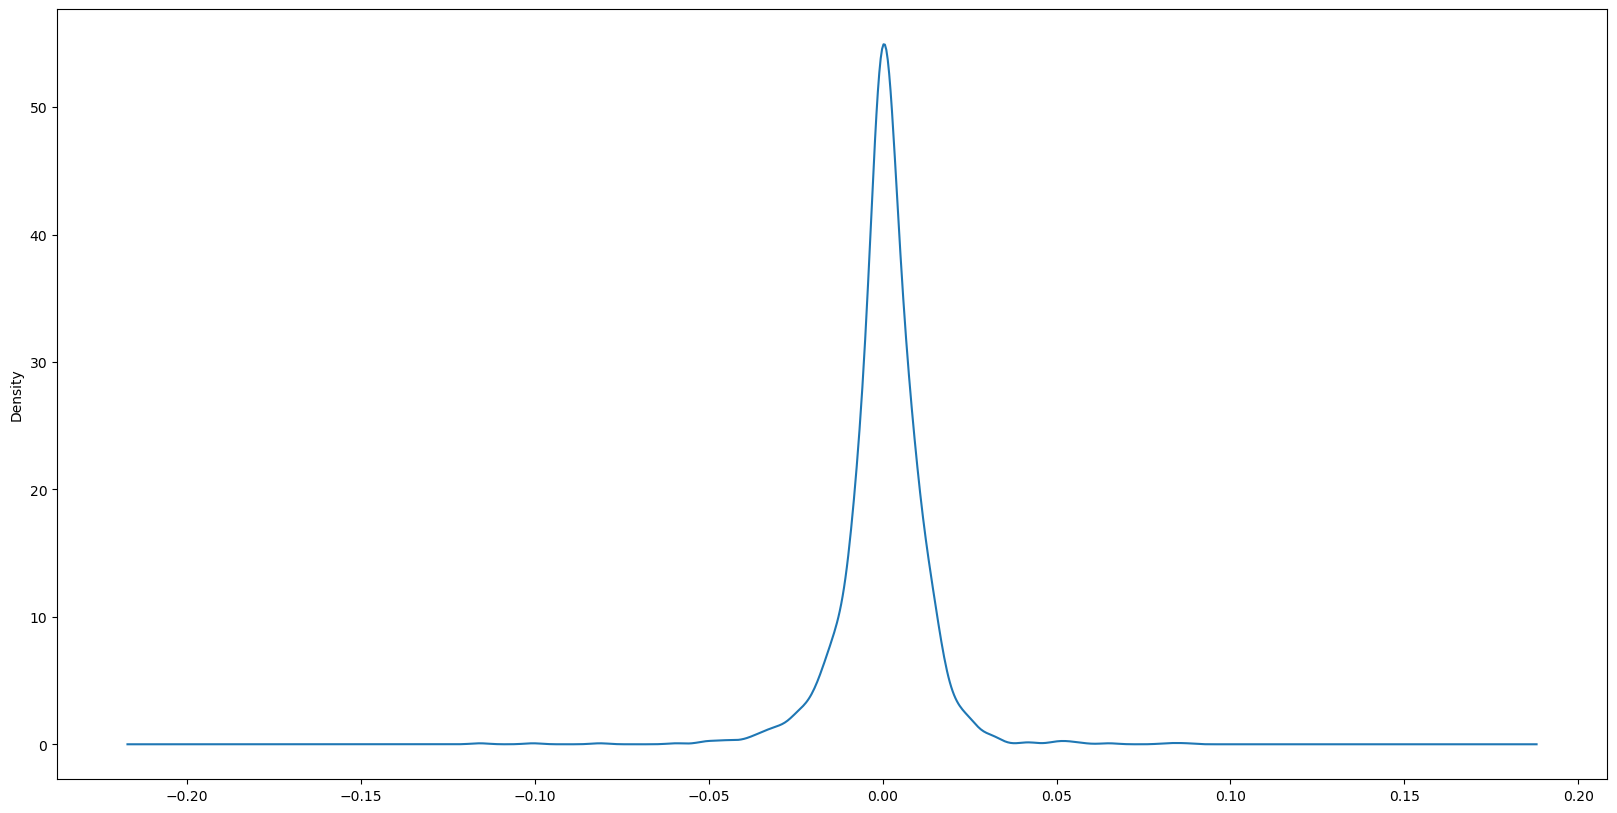

In [22]:
plt.figure(figsize = (20,10))
spy.log_return.plot.density()
plt.show()

<Figure size 2000x1000 with 0 Axes>

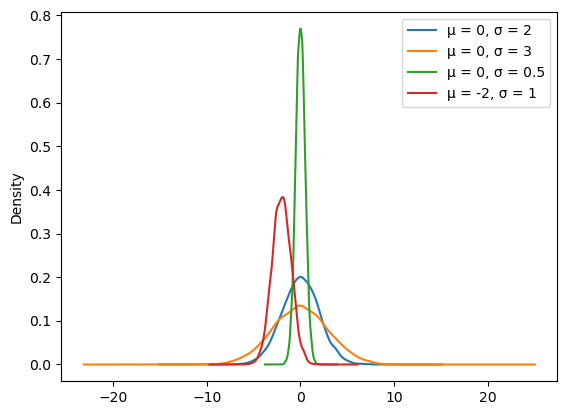

In [23]:
de_2 = pd.Series(np.random.normal(0,2,10000),name = 'μ = 0, σ = 2')
de_3 = pd.Series(np.random.normal(0,3,10000),name = 'μ = 0, σ = 3')
de_0 = pd.Series(np.random.normal(0,0.5,10000), name ='μ = 0, σ = 0.5')
mu_1 = pd.Series(np.random.normal(-2,1,10000),name ='μ = -2, σ = 1')
df = pd.concat([de_2,de_3,de_0,mu_1],axis = 1)
plt.figure(figsize=(20,10))
df.plot.density()
plt.show()